## Argo File Loader

In [ ]:
# try with newest snapshot
# try with ftp that gmaze used in issue, probably going to be really slow

In [3]:
import argopy
from argopy import DataFetcher as ArgoDataFetcher
argo_loader=ArgoDataFetcher(src='gdac',ftp="/swot/SUM05/dbalwada/Argo_sync",parallel=True,progress=True)

import filt_funcs as ff
import density_funcs as df
import plot_funcs as pf
import gsw
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

## Load by box (coordinate: N_PROF)

In [2]:
#box=[lon_min,lon_max,lat_min,lat_max,depth_min,depth_max]
box_lows=[-10,0,-40,-30,0,2000]
box_high=[-55,-45,-45,-35,0,2000]
box_medi=[-20,-10,35,45,0,2000]
box_gyre=[-40,-30,20,30,0,2000]

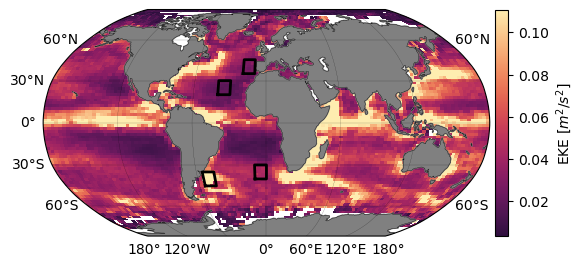

In [3]:
pf.plot_box([box_lows,box_high,box_medi,box_gyre])

In [4]:
box_1x = [-10,0,-10,0,0,2000]   #error
box_1y = [-10,0,-20,-10,0,2000] #done
box_1z = [-10,0,-30,-20,0,2000] #done
box_1a = [-10,0,-40,-30,0,2000] #done
box_1b = [-10,0,-50,-40,0,2000] #done
box_1c = [-10,0,-60,-50,0,2000] #done
box_1d = [-10,0,-70,-60,0,2000]
box_long=[-10,-8,-70,-10,0,2000]

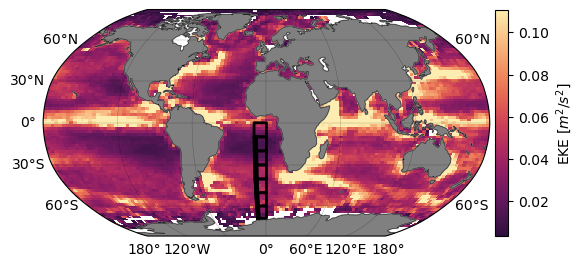

In [5]:
pf.plot_box([box_1x,box_1y,box_1z,box_1a,box_1b,box_1c,box_1d,box_long])

In [6]:
ds_z=ff.get_box(box_long,4)

loading points complete


100%|██████████| 708/708 [41:16<00:00,  3.50s/it]


to xarray complete
point to profile complete
interpolation complete
adding spice complete


In [7]:
ds_z = ds_z.assign_attrs({"Fetched_uri":''})

In [8]:
ds_z

<xarray.Dataset>
Dimensions:                (N_PROF: 761, PRES_INTERPOLATED: 1000)
Coordinates:
  * N_PROF                 (N_PROF) int64 1215 1216 1217 1219 ... 4449 4450 4451
    TIME                   (N_PROF) datetime64[ns] 2015-11-25T23:34:22 ... 20...
    LATITUDE               (N_PROF) float64 -48.89 -48.29 ... -47.38 -46.22
    LONGITUDE              (N_PROF) float64 -8.963 -9.037 ... -8.285 -8.139
  * PRES_INTERPOLATED      (PRES_INTERPOLATED) int64 0 2 4 6 ... 1994 1996 1998
    N_PROF_NEW             (N_PROF) int64 0 1 2 3 4 5 ... 756 757 758 759 760
Data variables:
    CONFIG_MISSION_NUMBER  (N_PROF) int32 4 4 4 2 2 4 4 4 ... 8 8 8 8 10 10 10 6
    CT                     (N_PROF, PRES_INTERPOLATED) float64 3.279 ... 1.839
    CYCLE_NUMBER           (N_PROF) int32 116 117 118 106 ... 119 120 121 101
    DATA_MODE              (N_PROF) <U1 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D'
    DIRECTION              (N_PROF) <U1 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER        (N_PROF) int32 1901599 1901599 ... 7900202 7900203
    PRES                   (N_PROF, PRES_INTERPOLATED) float32 1.1 ... 1.998e+03
    PSAL                   (N_PROF, PRES_INTERPOLATED) float32 33.82 ... 34.76
    SA                     (N_PROF, PRES_INTERPOLATED) float64 33.98 ... 34.93
    SIG0                   (N_PROF, PRES_INTERPOLATED) float64 26.92 ... 27.8
    TEMP                   (N_PROF, PRES_INTERPOLATED) float32 3.273 ... 1.976
    SPICE                  (N_PROF, PRES_INTERPOLATED) float64 -0.5596 ... -0...
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         /swot/SUM05/dbalwada/Argo_sync
    Fetched_by:           amf2288
    Fetched_date:         2023/08/03
    Fetched_constraints:  [x=-10.00/-8.00; y=-70.00/-10.00; z=0.0/2000.0]
    Fetched_uri:          
    history:              Variables filtered according to DATA_MODE; Variable...

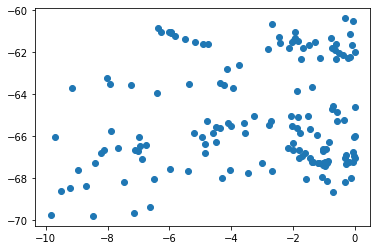

In [39]:
plt.scatter(ds_z.LONGITUDE, ds_z.LATITUDE)

In [9]:
ds_z.to_netcdf("202206_boxes/lon:({},{})_lat:({},{})_ds_z.nc".format(box_long[0],box_long[1],box_long[2],box_long[3]))

In [ ]:
erddap_loader=ArgoDataFetcher(src'erddap',parallel=True,progress=True)

In [41]:
gmaze_loader=ArgoDataFetcher(src='gdac',ftp='https://data-argo.ifremer.fr/',parallel=True,progress=True)

In [ ]:
usa_loader=ArgoDataFetcher(src='gdac',ftp='ftp://usgodae.org/pub/outgoing/argo',parallel=True,progress=True)

In [45]:
ds=argo_loader.region(box_1x)
print('loading points complete')
ds=ds.to_xarray()
print('to xarray complete')

loading points complete


100%|██████████| 193/193 [14:02<00:00,  4.37s/it]


ValueError: 'PROFILE_PSAL_QC' is not present in all datasets.

In [ ]:
ds=ds.argo.teos10(['CT','SA','SIG0'])
ds=ds.argo.point2profile()
print('point to profile complete')

In [7]:
def test_get_box(box,sample_min):
    '''Takes latitude/longitude/depth data and a sample rate and returns an xarray with CT, SA, SIG0, and SPICE interpolated to a pressure grid of 2m. 
    
    box: lat/lon in the form: box=[lon_min, lon_max, lat_min, lat_max, depth_min, depth_max]
    sample_min: minimum sample rate [m]
    '''
    
    ds=argo_loader.region(box)
    print('loading points complete')
    
    ds=ds.to_xarray()
    print('to xarray complete')
    
    ds=ds.argo.teos10(['CT','SA','SIG0'])
    ds=ds.argo.point2profile()
    print('point to profile complete')
    
    ds_interp=get_ds_interp(ds,0,2000,sample_min)
    print('interpolation complete')
    
    ds_interp['SPICE'] = gsw.spiciness0(ds_interp.SA,ds_interp.CT).rename('SPICE')
    print('adding spice complete')
        
    return ds_interp

In [8]:
test = test_get_box(box_medi,4)

loading points complete


100%|██████████| 240/240 [11:02<00:00,  2.76s/it]


AttributeError: 'Dataset' object has no attribute 'PSAL'

In [18]:
ds=argo_loader.region(box_medi)

In [19]:
ds = ds.data

In [20]:
ds

<xarray.Dataset>
Dimensions:                (N_POINTS: 1405747)
Coordinates:
  * N_POINTS               (N_POINTS) int64 0 1 2 3 ... 1405744 1405745 1405746
    TIME                   (N_POINTS) datetime64[ns] 1999-09-29T03:28:00.0000...
    LATITUDE               (N_POINTS) float64 42.0 42.0 42.0 ... 42.8 42.8 42.8
    LONGITUDE              (N_POINTS) float64 -16.0 -16.0 ... -19.78 -19.78
Data variables:
    CONFIG_MISSION_NUMBER  (N_POINTS) int32 1 1 1 1 1 1 1 ... 65 65 65 65 65 65
    CYCLE_NUMBER           (N_POINTS) int32 0 0 0 0 0 0 ... 226 226 226 226 226
    DATA_MODE              (N_POINTS) <U1 'D' 'D' 'D' 'D' ... 'A' 'A' 'A' 'A'
    DIRECTION              (N_POINTS) <U1 'D' 'D' 'D' 'D' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER        (N_POINTS) int32 69003 69003 ... 6901193 6901193
    POSITION_QC            (N_POINTS) int32 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    PRES                   (N_POINTS) float32 58.0 63.0 ... 1.997e+03 1.999e+03
    PRES_QC                (N_POINTS) int32 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TEMP                   (N_POINTS) float32 15.02 14.69 14.41 ... 3.689 3.684
    TEMP_QC                (N_POINTS) int32 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TIME_QC                (N_POINTS) int32 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         /swot/SUM05/dbalwada/Argo_sync
    Fetched_by:           amf2288
    Fetched_date:         2023/07/27
    Fetched_constraints:  [x=-20.00/-10.00; y=35.00/45.00; z=0.0/2000.0]
    Fetched_uri:          /swot/SUM05/dbalwada/Argo_sync/dac/coriolis/1900350...
    history:              Variables filtered according to DATA_MODE; Variable...

In [16]:
ds.PSAL.dropna('N_POINTS')

AttributeError: 'Dataset' object has no attribute 'PSAL'

In [ ]:
for n in range(0,len(ds.N_PROF)):
    

In [ ]:
'''
methods are also functions, but specific to the class they're applied to
class (animals) --> subclass (dogs) --> object (golden retriever)
open_mfdataset() from xarray, for opening data in multiple netcdfs
1) write loop opening all files yourself, check for PSAL, if not there remove file
2) go into open_mfdataset() and see if there's a loop there to exploit instead

locally install repo (pip install -e??)
uses the code from the local repo instead
then make changes to repo: print statement in part of the code we think is happening
then work on loops, etc.


'''

In [ ]:
def to_xarray(self, errors: str = "ignore"):
        """ Load Argo data and return a :class:`xarray.Dataset`

        Parameters
        ----------
        errors: str, default='ignore'
            Define how to handle errors raised during data URIs fetching:

                - 'ignore' (default): Do not stop processing, simply issue a debug message in logging console
                - 'silent':  Do not stop processing and do not issue log message
                - 'raise': Raise any error encountered

        Returns
        -------
        :class:`xarray.Dataset`
        """
        if (
            len(self.uri) > 50
            and isinstance(self.method, str)
            and self.method == "sequential"
        ):
            warnings.warn(
                "Found more than 50 files to load, this may take a while to process sequentially ! "
                "Consider using another data source (eg: 'erddap') or the 'parallel=True' option to improve processing time."
            )
        elif len(self.uri) == 0:
            raise DataNotFound("No data found for: %s" % self.indexfs.cname)

        # Download data:
        ds = self.fs.open_mfdataset(
            self.uri, #list of all float files?
            method=self.method,
            concat_dim="N_POINTS",
            concat=True,
            preprocess=self._preprocess_multiprof,
            progress=self.progress,
            errors=errors,
            open_dataset_opts={'xr_opts': {'decode_cf': 1, 'use_cftime': 0, 'mask_and_scale': 1}},
        )

        # Data post-processing:
        ds["N_POINTS"] = np.arange(
            0, len(ds["N_POINTS"])
        )  # Re-index to avoid duplicate values
        ds = ds.set_coords("N_POINTS")
        ds = ds.sortby("TIME")

        # Remove netcdf file attributes and replace them with simplified argopy ones:
        ds.attrs = {}
        if self.dataset_id == "phy":
            ds.attrs["DATA_ID"] = "ARGO"
        if self.dataset_id == "bgc":
            ds.attrs["DATA_ID"] = "ARGO-BGC"
        ds.attrs["DOI"] = "http://doi.org/10.17882/42182"
        ds.attrs["Fetched_from"] = self.server
        ds.attrs["Fetched_by"] = getpass.getuser()
        ds.attrs["Fetched_date"] = pd.to_datetime("now", utc=True).strftime("%Y/%m/%d")
        ds.attrs["Fetched_constraints"] = self.cname()
        if len(self.uri) == 1:
            ds.attrs["Fetched_uri"] = self.uri[0]
        else:
            ds.attrs["Fetched_uri"] = ";".join(self.uri)

        return ds

In [ ]:
print(ds_z.SIG0.values.min(), ds_z.SIG0.values.max())

In [ ]:
rho_grid = np.linspace(26.6, 28, 1001)

In [ ]:
ds_rho = df.interpolate2density_prof(ds_z, rho_grid)

In [ ]:
ds_rho

In [ ]:
ds_rho.to_netcdf("202206_boxes/lon:({},{})_lat:({},{})_ds_rho.nc".format(box[0],box[1],box[2],box[3]))

## Load by float (coordinate: distance)

In [ ]:
float_ID = 6901265

In [ ]:
ds_z = ff.get_float(float_ID, 4)

In [ ]:
ds_z = ds_z.assign_attrs({"Fetched_uri":''})

In [ ]:
ds_z

In [ ]:
ds_z.to_netcdf("202206_floats/float_ID:({})_ds_z.nc".format(float_ID))

In [ ]:
print(ds_z.SIG0.values.min(), ds_z.SIG0.values.max())

In [ ]:
rho_grid = np.linspace(26.4, 28, 1001)

In [ ]:
ds_rho = df.interpolate2density_prof(ds_z, rho_grid)

In [ ]:
ds_rho

In [ ]:
ds_rho.to_netcdf("202206_floats/float_ID:({})_ds_rho.nc".format(float_ID))

## Loading Boxes by Degree

In [132]:
lons = np.arange(-180,181,4)
lats = np.arange(-90,91,4)

boxes=[]

for n in range(0,len(lons)-1):
    for m in range(0,len(lats-1)):
        lon_min = lons[n]
        lon_max = lons[n+1]
        lat_min = lats[n]
        lat_max = lats[n+1]
        box_n = np.array([lon_min, lon_max, lat_min, lat_max])
        boxes.append(box_n)

IndexError: index 46 is out of bounds for axis 0 with size 46

In [136]:
n=0
lons[n+1]

-176

In [64]:
from argopy import IndexFetcher as ArgoIndexFetcher

box_bad=[-15,-14,36.5,37]#, '2000-01-01', '2021-06'] # need to remove pressure poinds because the region function for this index fetcher seems a bit different.

idx = ArgoIndexFetcher(src='gdac',dataset='phy',mode='standard',
                            ftp="/swot/SUM05/dbalwada/202203-ArgoData").region(box_bad).load()
idx.index

,file,date,latitude,longitude,ocean,profiler_code,institution_code,date_update,wmo,institution,profiler
0,aoml/1900041/profiles/D1900041_067.nc,2004-01-02 22:27:49,36.687,-14.002,A,851,AO,2019-05-05 16:50:37,1900041,"AOML, USA","Solo, Seabird conductivity sensor"
1,aoml/1900749/profiles/D1900749_015.nc,2007-05-08 11:55:38,36.716,-14.029,A,851,AO,2019-05-23 14:23:26,1900749,"AOML, USA","Solo, Seabird conductivity sensor"
2,aoml/1900778/profiles/D1900778_123.nc,2011-02-08 11:01:58,36.814,-14.919,A,851,AO,2019-05-30 16:23:14,1900778,"AOML, USA","Solo, Seabird conductivity sensor"
3,coriolis/3901932/profiles/D3901932_118.nc,2021-08-23 06:22:00,36.948,-14.746,A,844,IF,2021-12-01 18:03:09,3901932,"Ifremer, France","Arvor, Seabird conductivity sensor"
4,coriolis/6900137/profiles/D6900137_058.nc,2006-01-21 04:15:00,36.907,-14.205,A,840,IF,2015-10-19 19:21:25,6900137,"Ifremer, France","Provor, no conductivity"
5,coriolis/6900137/profiles/D6900137_059.nc,2006-01-31 04:15:00,36.858,-14.127,A,840,IF,2015-10-19 19:21:26,6900137,"Ifremer, France","Provor, no conductivity"
6,coriolis/6900137/profiles/D6900137_060.nc,2006-02-10 04:39:00,36.954,-14.219,A,840,IF,2015-10-19 19:21:27,6900137,"Ifremer, France","Provor, no conductivity"
7,coriolis/6900137/profiles/D6900137_061.nc,2006-02-20 03:56:00,36.988,-14.305,A,840,IF,2015-10-19 19:21:27,6900137,"Ifremer, France","Provor, no conductivity"
8,coriolis/6900231/profiles/D6900231_036.nc,2004-12-12 17:48:03,36.642,-14.533,A,846,IF,2019-06-03 19:58:58,6900231,"Ifremer, France","Webb Research, Seabird sensor"
9,coriolis/6900231/profiles/D6900231_037.nc,2004-12-22 18:16:56,36.644,-14.734,A,846,IF,2019-06-03 19:58:59,6900231,"Ifremer, France","Webb Research, Seabird sensor"


In [34]:
float_IDs = [1900041,1900749,]

argopy.fetchers.ArgoIndexFetcher